In [102]:
import pandas as pd

# Load crop production dataset
crop_df = pd.read_csv('cropproduction.csv')

In [103]:
# Add a 'Data Source' column to each dataframe
crop_df

,Statistic Label,Year,Type of Crop,UNIT,VALUE
0,Crop Production,2008,"Total wheat, oats and barley",000 Tonnes,2461.3
1,Crop Production,2008,Total wheat,000 Tonnes,992.8
2,Crop Production,2008,Winter wheat,000 Tonnes,839.9
3,Crop Production,2008,Spring wheat,000 Tonnes,153.0
4,Crop Production,2008,Total oats,000 Tonnes,174.3
...,...,...,...,...,...
203,Crop Production,2023,Winter barley,000 Tonnes,458.9
204,Crop Production,2023,Spring barley,000 Tonnes,844.3
205,Crop Production,2023,Beans and peas,000 Tonnes,81.3
206,Crop Production,2023,Oilseed rape,000 Tonnes,97.3


In [104]:
# Display information about each dataset
print("Crop Production Dataset - Information:")
print(crop_df.info())

Crop Production Dataset - Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  208 non-null    object 
 1   Year             208 non-null    int64  
 2   Type of Crop     208 non-null    object 
 3   UNIT             208 non-null    object 
 4   VALUE            208 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.3+ KB
None


In [105]:
# Summary statistics for each dataset
print("\nCrop Production Dataset - Summary Statistics:")
print(crop_df.describe())



Crop Production Dataset - Summary Statistics:
              Year        VALUE
count   208.000000   208.000000
mean   2015.500000   565.158173
std       4.620894   657.405720
min    2008.000000    11.100000
25%    2011.750000    80.400000
50%    2015.500000   321.000000
75%    2019.250000   734.175000
max    2023.000000  2633.600000


In [106]:
# Check for missing values in each dataset
print("\nCrop Production Dataset - Missing Values:")
print(crop_df.isnull().sum())


Crop Production Dataset - Missing Values:
Statistic Label    0
Year               0
Type of Crop       0
UNIT               0
VALUE              0
dtype: int64


In [107]:
# Check for duplicates in each dataset
print("\nCrop Production Dataset - Duplicates:")
print(crop_df.duplicated().sum())


Crop Production Dataset - Duplicates:
0


In [108]:
# Drop columns from crop production dataset
crop_df.drop(columns=['Statistic Label', 'UNIT', ], inplace=True)
crop_df

,Year,Type of Crop,VALUE
0,2008,"Total wheat, oats and barley",2461.3
1,2008,Total wheat,992.8
2,2008,Winter wheat,839.9
3,2008,Spring wheat,153.0
4,2008,Total oats,174.3
...,...,...,...
203,2023,Winter barley,458.9
204,2023,Spring barley,844.3
205,2023,Beans and peas,81.3
206,2023,Oilseed rape,97.3


<Figure size 1200x600 with 0 Axes>

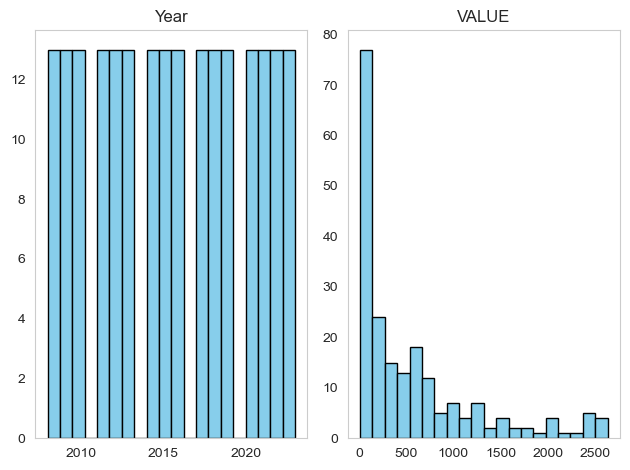

Year              int64
Type of Crop     object
VALUE           float64
dtype: object


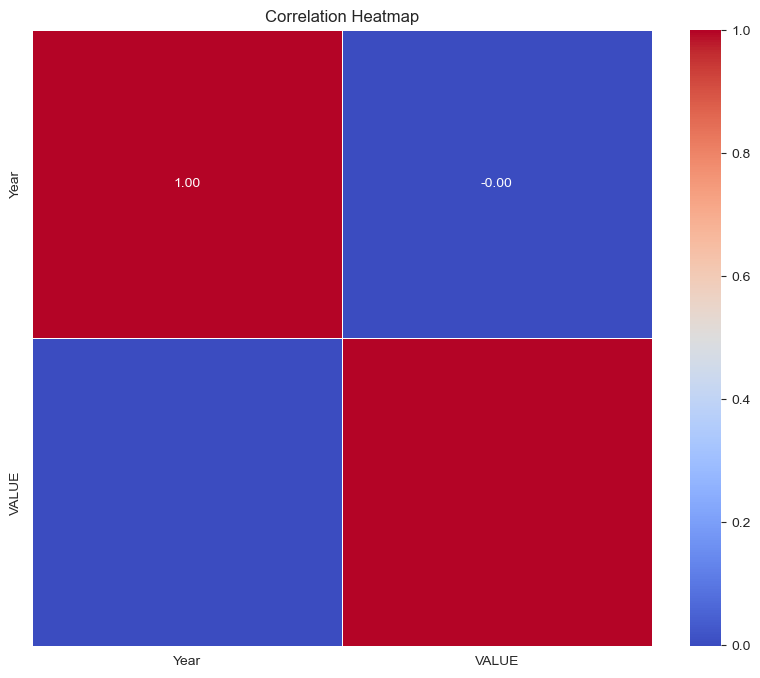

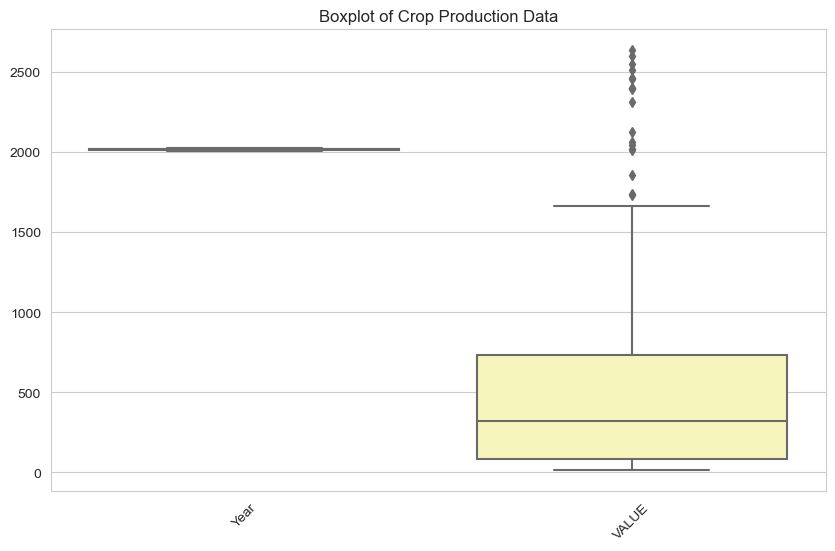

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


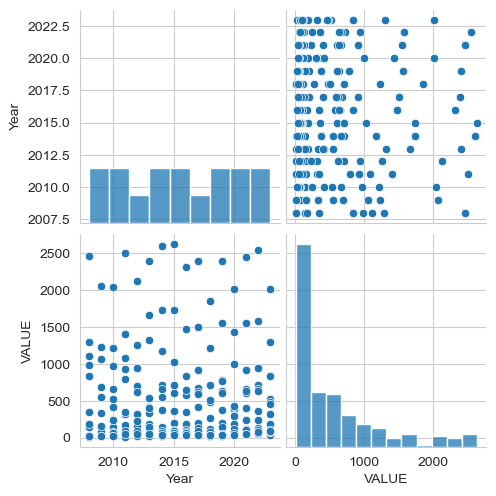

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histograms of numerical variables
plt.figure(figsize=(12, 6))
crop_df.hist(bins=20, color='skyblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

# Check data types of columns
print(crop_df.dtypes)

# Exclude non-numeric columns before computing correlation
numeric_columns = crop_df.select_dtypes(include=['int64', 'float64']).columns
correlation_df = crop_df[numeric_columns]

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Plot boxplots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=crop_df, palette='Set3')
plt.title('Boxplot of Crop Production Data')
plt.xticks(rotation=45)
plt.show()

# Plot pairplot to visualize relationships between variables
sns.pairplot(crop_df)
plt.show()

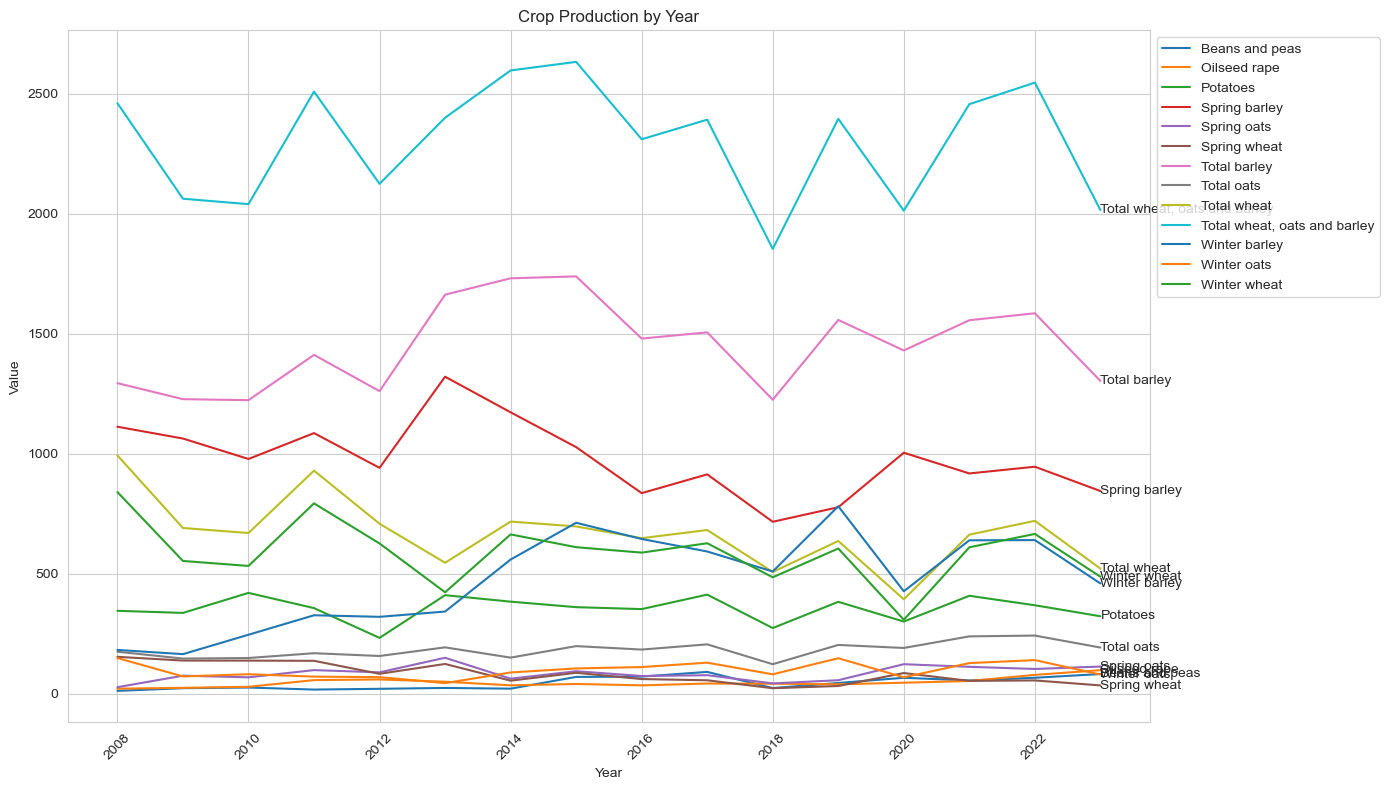

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Pivot the data to have 'Year' as index, 'Type of Crop' as columns, and 'VALUE' as values
pivot_crop_df = crop_df.pivot(index='Year', columns='Type of Crop', values='VALUE')

# Plot the time series data
plt.figure(figsize=(14, 8))
for column in pivot_crop_df.columns:
    plt.plot(pivot_crop_df.index, pivot_crop_df[column], label=column)

# Annotate each line with the name of the corresponding crop type
for column in pivot_crop_df.columns:
    plt.text(pivot_crop_df.index[-1], pivot_crop_df[column].iloc[-1], column, ha='left', va='center')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Crop Production by Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()


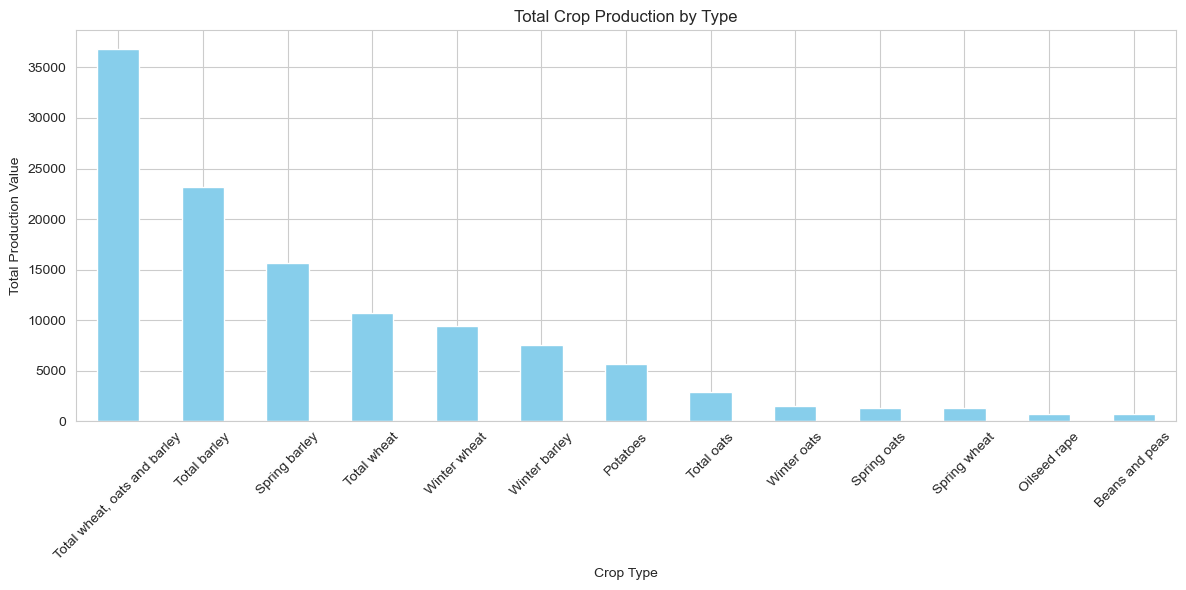

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Calculate total production value of each crop type across all years (for the bar graph)
total_production = crop_df.groupby('Type of Crop')['VALUE'].sum().sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 6))
total_production.plot(kind='bar', color='skyblue')
plt.title('Total Crop Production by Type')
plt.xlabel('Crop Type')
plt.ylabel('Total Production Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Choose the last year in the dataset
last_year = crop_df['Year'].max()

# Filter data for the last year
last_year_data = crop_df[crop_df['Year'] == last_year]

# Calculate production value for each crop type in the last year (for the pie chart)
production_last_year = last_year_data.groupby('Type of Crop')['VALUE'].sum()




In [114]:
# Load livestock dataset
livestock_df = pd.read_csv('livestock.csv')
livestock_df

,STATISTIC Label,Year,Type of Animal,Region,UNIT,VALUE
0,Number of Livestock in June,2015,Total cattle,State,000 Head,6963.5
1,Number of Livestock in June,2015,Total cattle,Northern and Western,000 Head,1723.9
2,Number of Livestock in June,2015,Total cattle,Border,000 Head,793.6
3,Number of Livestock in June,2015,Total cattle,West,000 Head,930.2
4,Number of Livestock in June,2015,Total cattle,Southern,000 Head,3750.1
...,...,...,...,...,...,...
3658,Number of Livestock in June,2023,Total farmed deer,South-East,000 Head,NaN
3659,Number of Livestock in June,2023,Total farmed deer,South-West,000 Head,NaN
3660,Number of Livestock in June,2023,Total farmed deer,Eastern and Midland,000 Head,NaN
3661,Number of Livestock in June,2023,Total farmed deer,Dublin and Mid-East,000 Head,NaN


In [115]:
print("\nLivestock Dataset - Information:")
print(livestock_df.info())


Livestock Dataset - Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  3663 non-null   object 
 1   Year             3663 non-null   int64  
 2   Type of Animal   3663 non-null   object 
 3   Region           3663 non-null   object 
 4   UNIT             3663 non-null   object 
 5   VALUE            3278 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 171.8+ KB
None


In [116]:
print("\nLivestock Dataset - Summary Statistics:")
print(livestock_df.describe())


Livestock Dataset - Summary Statistics:
              Year        VALUE
count  3663.000000  3278.000000
mean   2019.000000   413.392068
std       2.582341   737.681074
min    2015.000000     0.000000
25%    2017.000000    46.825000
50%    2019.000000   179.700000
75%    2021.000000   454.900000
max    2023.000000  7396.200000


In [117]:
print("\nLivestock Dataset - Missing Values:")
print(livestock_df.isnull().sum())


Livestock Dataset - Missing Values:
STATISTIC Label      0
Year                 0
Type of Animal       0
Region               0
UNIT                 0
VALUE              385
dtype: int64


In [118]:
livestock_df.dropna(inplace=True)
print("\nLivestock Dataset - Duplicates:")
print(livestock_df.duplicated().sum())


Livestock Dataset - Duplicates:
0


In [119]:
# Drop columns from livestock dataset
livestock_df.drop(columns=['STATISTIC Label', 'UNIT'], inplace=True)
livestock_df

,Year,Type of Animal,Region,VALUE
0,2015,Total cattle,State,6963.5
1,2015,Total cattle,Northern and Western,1723.9
2,2015,Total cattle,Border,793.6
3,2015,Total cattle,West,930.2
4,2015,Total cattle,Southern,3750.1
...,...,...,...,...
3647,2023,Total goats,South-East,0.7
3648,2023,Total goats,South-West,1.2
3649,2023,Total goats,Eastern and Midland,2.7
3650,2023,Total goats,Dublin and Mid-East,1.5


<Figure size 1200x600 with 0 Axes>

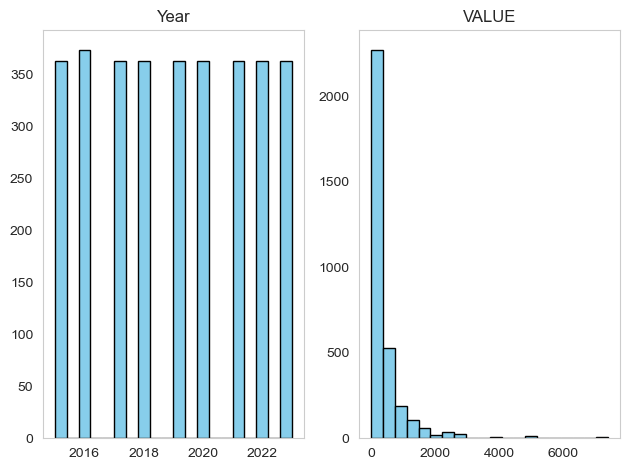

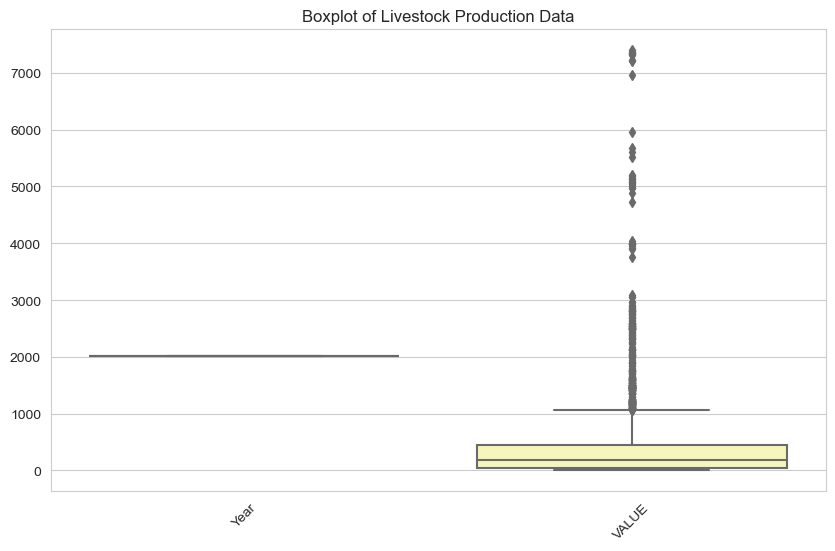

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


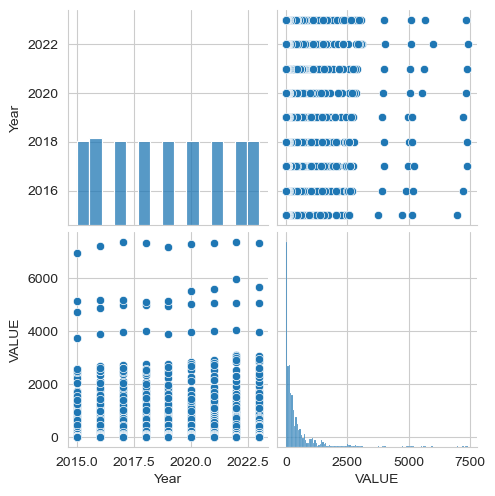

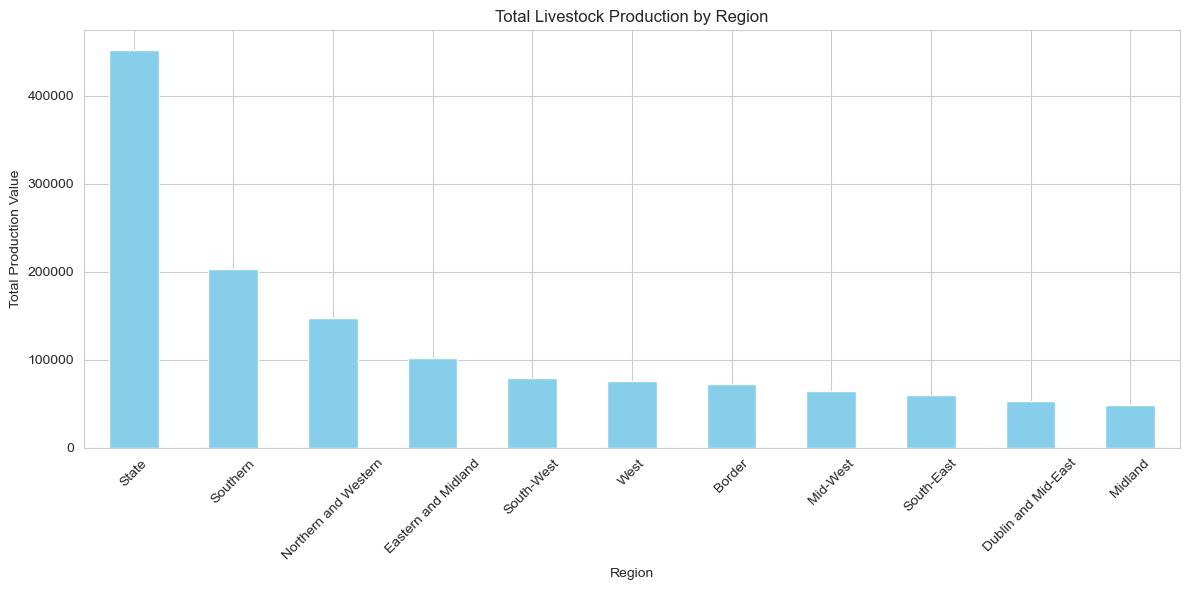

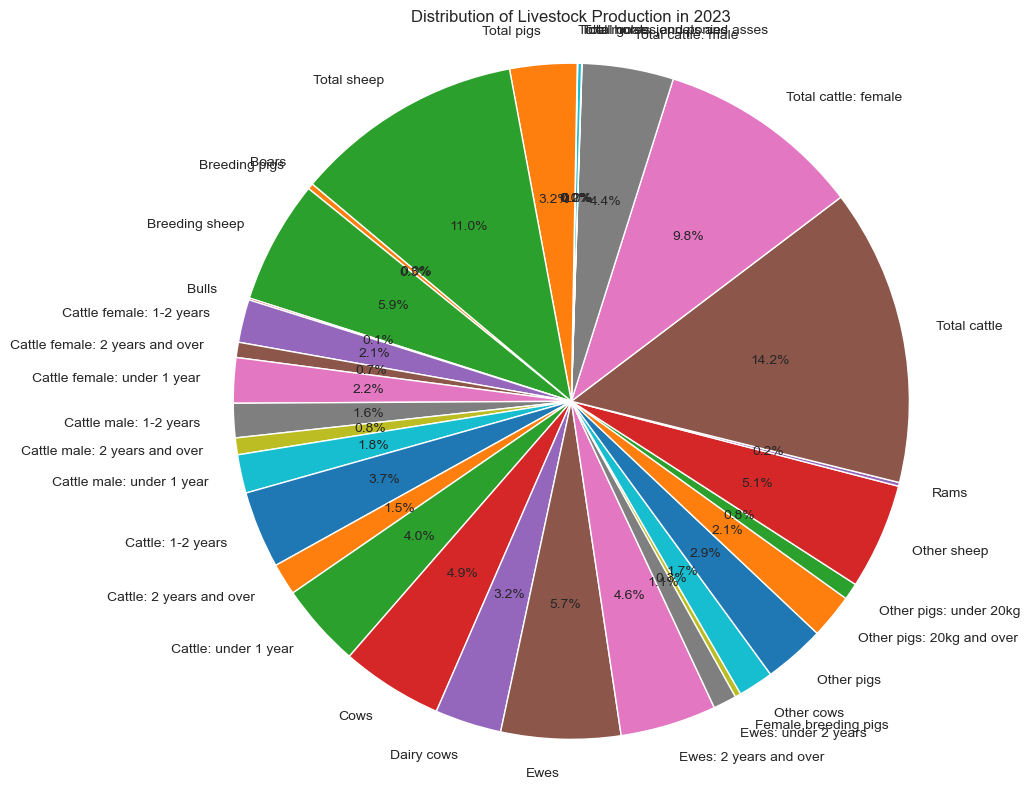

In [120]:
# Plot histograms of numerical variables
plt.figure(figsize=(12, 6))
livestock_df.hist(bins=20, color='skyblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

# Plot boxplots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=livestock_df, palette='Set3')
plt.title('Boxplot of Livestock Production Data')
plt.xticks(rotation=45)
plt.show()

# Plot pairplot to visualize relationships between variables
sns.pairplot(livestock_df)
plt.show()

# Plot total production value by region (bar graph)
total_production_region = livestock_df.groupby('Region')['VALUE'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
total_production_region.plot(kind='bar', color='skyblue')
plt.title('Total Livestock Production by Region')
plt.xlabel('Region')
plt.ylabel('Total Production Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Choose a specific year for the pie chart
specific_year = livestock_df['Year'].max()

# Filter data for the specific year
specific_year_data = livestock_df[livestock_df['Year'] == specific_year]

# Calculate production value for each animal type in the specific year (for the pie chart)
production_specific_year = specific_year_data.groupby('Type of Animal')['VALUE'].sum()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(production_specific_year, labels=production_specific_year.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Livestock Production in {specific_year}')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [121]:

# Load import/export dataset
import_export_df = pd.read_csv('import_export.csv')


In [122]:
import_export_df

,Statistic Label,Year,Sector of Activity,Size of Enterprise,UNIT,VALUE
0,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Micro (0 to 9),Euro Million,615.0
1,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Small (10 to 49),Euro Million,545.0
2,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Medium (50 to 249),Euro Million,1985.0
3,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Large (250 or more),Euro Million,14778.0
4,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Unknown,Euro Million,NaN
...,...,...,...,...,...,...
139,Number of Importing Enterprises,2022,"Agriculture and Food (01-03,10-11)",Small (10 to 49),Number,411.0
140,Number of Importing Enterprises,2022,"Agriculture and Food (01-03,10-11)",Medium (50 to 249),Number,172.0
141,Number of Importing Enterprises,2022,"Agriculture and Food (01-03,10-11)",Large (250 or more),Number,60.0
142,Number of Importing Enterprises,2022,"Agriculture and Food (01-03,10-11)",Unknown,Number,NaN


In [123]:
# Display basic information about the dataset
print("Basic Information:")
print(import_export_df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Statistic Label     144 non-null    object 
 1   Year                144 non-null    int64  
 2   Sector of Activity  144 non-null    object 
 3   Size of Enterprise  144 non-null    object 
 4   UNIT                144 non-null    object 
 5   VALUE               120 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 6.9+ KB
None


In [124]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(import_export_df.describe())


Summary Statistics:
              Year         VALUE
count   144.000000    120.000000
mean   2019.500000   2395.933333
std       1.713786   4481.900859
min    2017.000000     43.000000
25%    2018.000000    232.500000
50%    2019.500000    600.500000
75%    2021.000000   2029.750000
max    2022.000000  18498.000000


In [125]:
# Check for missing values
print("\nMissing Values:")
print(import_export_df.isnull().sum())


Missing Values:
Statistic Label        0
Year                   0
Sector of Activity     0
Size of Enterprise     0
UNIT                   0
VALUE                 24
dtype: int64


In [126]:
# Drop rows with any NaN values
import_export_df.dropna(inplace=True)

In [127]:
# Drop columns from import/export dataset
import_export_df.drop(columns=[ 'UNIT'], inplace=True)
import_export_df

,Statistic Label,Year,Sector of Activity,Size of Enterprise,VALUE
0,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Micro (0 to 9),615.0
1,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Small (10 to 49),545.0
2,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Medium (50 to 249),1985.0
3,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Large (250 or more),14778.0
5,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",All Enterprises,17923.0
...,...,...,...,...,...
138,Number of Importing Enterprises,2022,"Agriculture and Food (01-03,10-11)",Micro (0 to 9),2147.0
139,Number of Importing Enterprises,2022,"Agriculture and Food (01-03,10-11)",Small (10 to 49),411.0
140,Number of Importing Enterprises,2022,"Agriculture and Food (01-03,10-11)",Medium (50 to 249),172.0
141,Number of Importing Enterprises,2022,"Agriculture and Food (01-03,10-11)",Large (250 or more),60.0


<Figure size 1200x600 with 0 Axes>

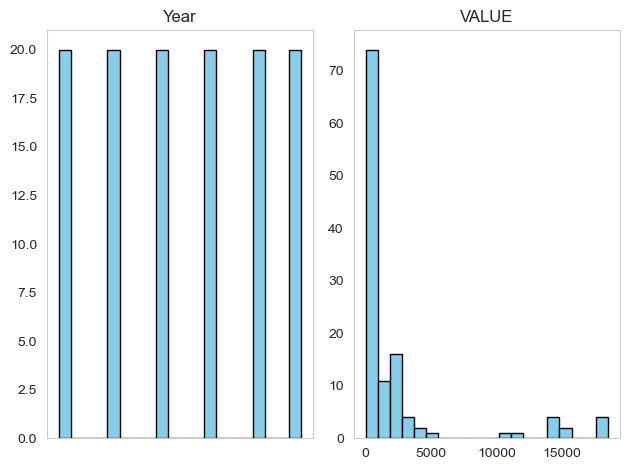

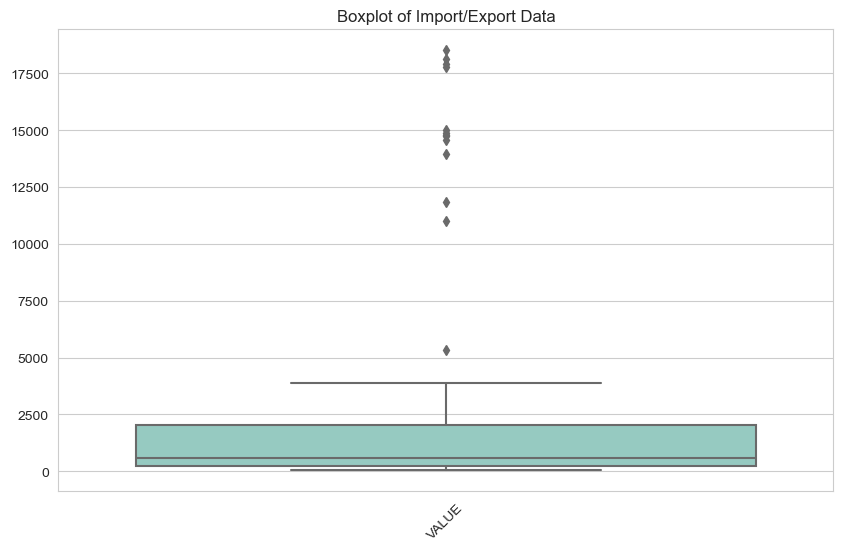

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


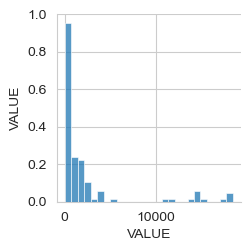

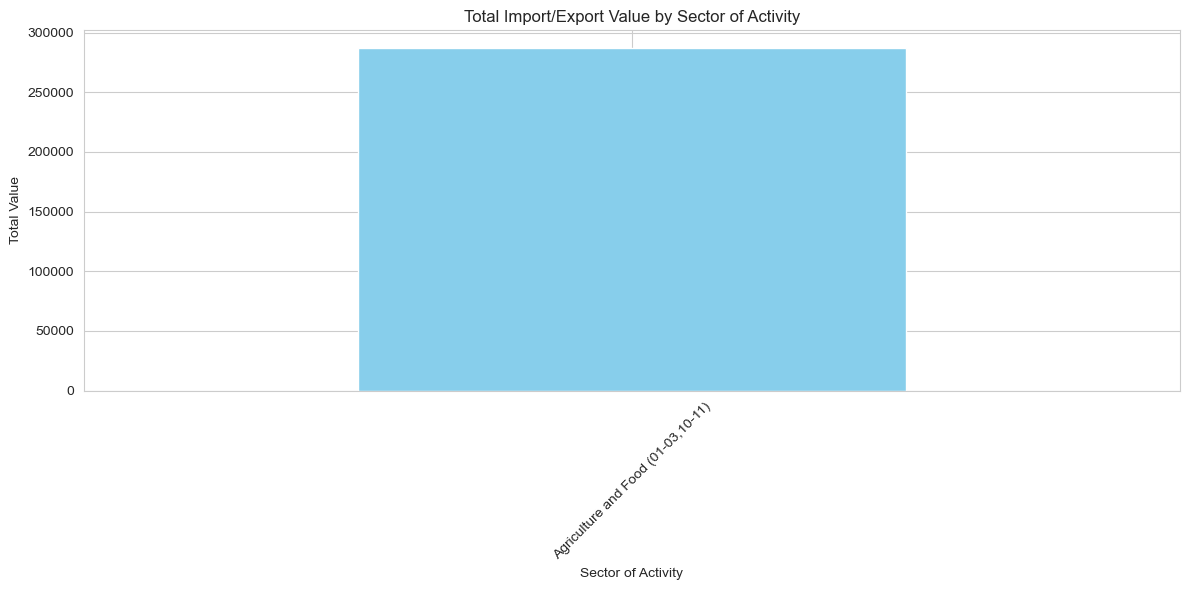

In [131]:
# Plot histograms of numerical variables
plt.figure(figsize=(12, 6))
import_export_df.hist(bins=20, color='skyblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

# Plot boxplots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=import_export_df, palette='Set3')
plt.title('Boxplot of Import/Export Data')
plt.xticks(rotation=45)
plt.show()

# Plot pairplot to visualize relationships between variables
sns.pairplot(import_export_df)
plt.show()

# Plot total import/export value by sector of activity (bar graph)
total_value_by_sector = import_export_df.groupby('Sector of Activity')['VALUE'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
total_value_by_sector.plot(kind='bar', color='skyblue')
plt.title('Total Import/Export Value by Sector of Activity')
plt.xlabel('Sector of Activity')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Choose a specific year for the pie chart
specific_year = import_export_df['Year'].max()

# Filter data for the specific year
specific_year_data = import_export_df[import_export_df['Year'] == specific_year]

# Calculate import/export value for each size of enterprise in the specific year (for the pie chart)
value_specific_year = specific_year_data.groupby('Size of Enterprise')['VALUE'].sum()



In [129]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataset is named 'import_export_df' and the target column is 'VALUE'

# Selecting only numeric columns
numeric_columns = import_export_df.select_dtypes(include=np.number).columns.tolist()
X_import_export = import_export_df[numeric_columns]

# Splitting the data into features (X) and target (y)
y_import_export = import_export_df['VALUE']

# Splitting the data into training and testing sets
X_train_import_export, X_test_import_export, y_train_import_export, y_test_import_export = train_test_split(
    X_import_export, y_import_export, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model_import_export = LinearRegression()
model_import_export.fit(X_train_import_export, y_train_import_export)

# Evaluate the model
import_export_pred = model_import_export.predict(X_test_import_export)
import_export_mse = mean_squared_error(y_test_import_export, import_export_pred)
import_export_r2 = r2_score(y_test_import_export, import_export_pred)

# Print evaluation metrics
print("Import/Export Data:")
print("Mean Squared Error:", import_export_mse)
print("R-squared Score:", import_export_r2)


Import/Export Data:
Mean Squared Error: 5.528337223788851e-27
R-squared Score: 1.0


In [136]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'import_export_df' contains the import/export data with features and target variable
# Replace 'import_export_df' with your actual dataset variable name

# Filter out non-numeric columns
numeric_columns = import_export_df.select_dtypes(include=np.number).columns
import_export_numeric = import_export_df[numeric_columns]

# Assuming 'VALUE' column contains the target variable (imports/exports)
y = import_export_numeric['VALUE'].values

# Assuming other columns are features (if any)
X = import_export_numeric.drop(columns=['VALUE']).values

# Scale the features to a range between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Output layer with one neuron for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Forecast future values
# Assuming 'X_future' contains the future features for prediction
X_future_scaled = scaler.transform(X_future)
X_future_reshaped = X_future_scaled.reshape(X_future_scaled.shape[0], 1, X_future_scaled.shape[1])
predicted_values = model.predict(X_future_reshaped)

# Inverse transform the predicted values to get the actual import/export values
predicted_values_actual = scaler.inverse_transform(predicted_values)


ValueError: Found array with 0 feature(s) (shape=(120, 0)) while a minimum of 1 is required by MinMaxScaler.